In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Python/Ads_CTR_Optimisation.csv')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [28]:
#Creating the model
import random
N = 10000
ads = 10
ads_selected = []
no_of_rewards_1 =[0] * ads
no_of_rewards_0 =[0] * ads
total_reward = 0

for n in range(0, N):
  ad = 0 
  highest_theta = 0 #maximum of random
  for i in range(0,ads):
    random_theta = random.betavariate(no_of_rewards_1[i]+1, no_of_rewards_0[i]+1) #formula to find theta
    if (random_theta > highest_theta):
      highest_theta = random_theta
      ad = i
  reward = df.values[n,ad]
  if reward == 1:
      no_of_rewards_1[ad] = no_of_rewards_1[ad] + 1
  else:
      no_of_rewards_0[ad] = no_of_rewards_0[ad] + 1
  total_reward += reward
  ads_selected.append(ad)


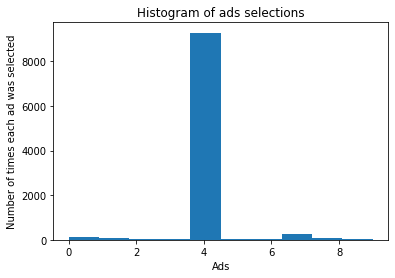

In [29]:
_# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()